# Vehicle Detection Project

In [1]:
%matplotlib inline
import os
import glob
import numpy as np
import pandas as pd
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import color, exposure
from sklearn.preprocessing import StandardScaler

In [2]:
# images are divided up into vehicles and non-vehicles
cars = glob.glob('training_set/vehicles/**/*.png')
notcars = glob.glob('training_set/non-vehicles/**/*.png')

Your function returned a count of 8792  cars and 8968  non-cars
of size:  (64, 64, 3)  and data type: float32


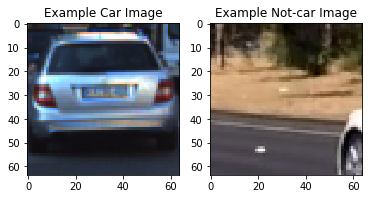

In [17]:
# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    example_img = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = example_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = example_img.dtype
    # Return data_dict
    return data_dict
    
data_info = data_look(cars, notcars)

print('Your function returned a count of', data_info["n_cars"], ' cars and', data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', data_info["data_type"])

# Just for fun choose random car / not-car indices and plot example images   
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))
    
# Read in car / not-car images
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])


# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(car_image)
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(notcar_image)
plt.title('Example Not-car Image')


## HOG Features

C:\Users\rudi\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


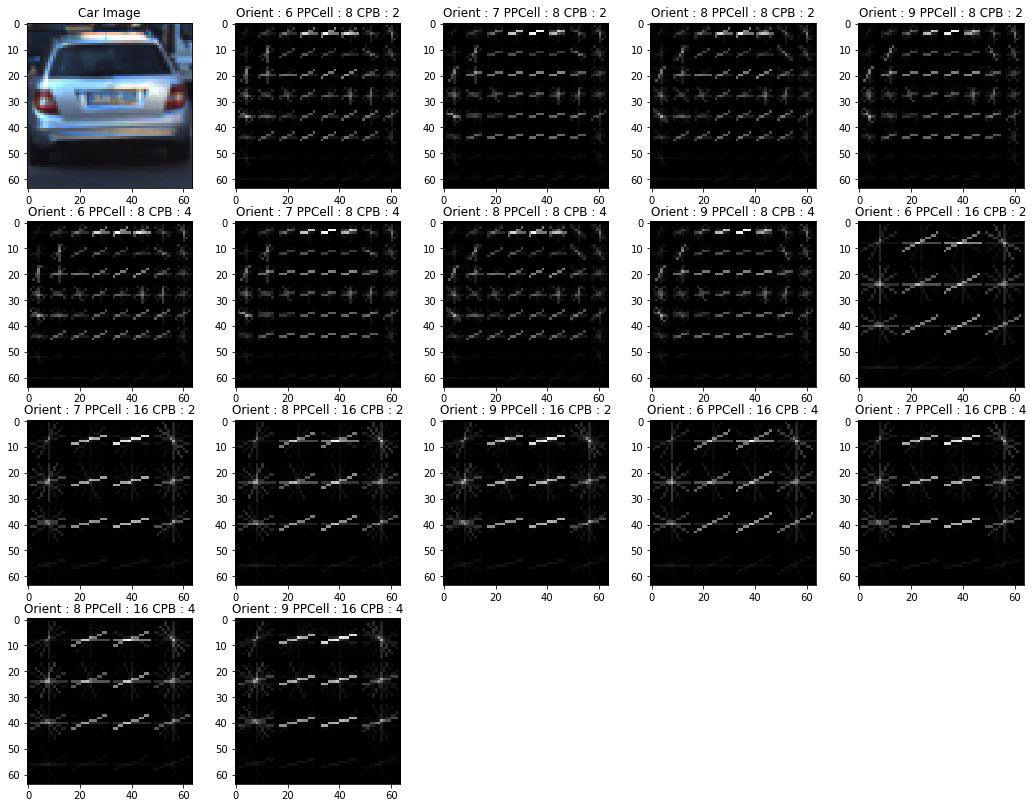

In [18]:
#pix_per_cell = 8
#cell_per_block = 2
orient = 6

hog_images = []
hog_features = []
img_gray = cv2.cvtColor(car_image, cv2.COLOR_RGB2GRAY)
for pix_per_cell in [8,16]:
    for cell_per_block in [2,4]:
        for i in range(6,10,1):
            orient = i
            features, hog_image = hog(img_gray, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell), cells_per_block=(cell_per_block, cell_per_block), visualise=True, feature_vector=False)    
            hog_features.append(features)
            hog_images.append([hog_image,(i,pix_per_cell,cell_per_block)])
    

pos = 1
#plt.rcParams['figure.figsize']
fig = plt.figure(figsize=(18,14))
plt.subplot(4,5,pos)
plt.imshow(car_image)
plt.title('Car Image')

pos += 1
orient = 6
cnt_features = 0
for hog_image in hog_images:
    plt.subplot(4,5,pos)
    plt.imshow(hog_image[0], cmap='gray')
    plt.title('Orient : {} PPCell : {} CPB : {}'.format(hog_image[1][0], hog_image[1][1], hog_image[1][2]))
    
    # unroll feature vector
    # NOTE: feature can be directly unrolled by the hog() function. Set feature_vector=True
    feature_vec = hog_features[cnt_features].ravel()
    pos += 1
    cnt_features += 1

C:\Users\rudi\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


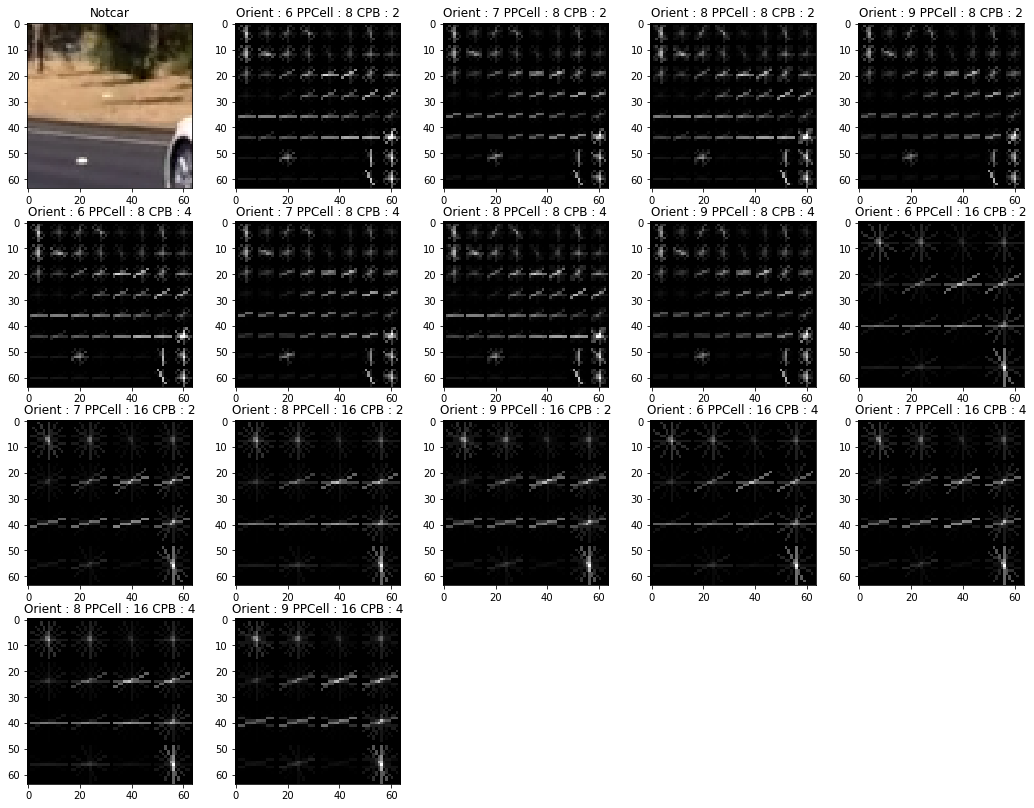

In [19]:
orient = 6

hog_images = []
hog_features = []
img_gray = cv2.cvtColor(notcar_image, cv2.COLOR_RGB2GRAY)
for pix_per_cell in [8,16]:
    for cell_per_block in [2,4]:
        for i in range(6,10,1):
            orient = i
            features, hog_image = hog(img_gray, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell), cells_per_block=(cell_per_block, cell_per_block), visualise=True, feature_vector=False)    
            hog_features.append(features)
            hog_images.append([hog_image,(i,pix_per_cell,cell_per_block)])
    

pos = 1
#plt.rcParams['figure.figsize']
fig = plt.figure(figsize=(18,14))
plt.subplot(4,5,pos)
plt.imshow(notcar_image)
plt.title('Notcar')

pos += 1
orient = 6
cnt_features = 0
for hog_image in hog_images:
    plt.subplot(4,5,pos)
    plt.imshow(hog_image[0], cmap='gray')
    plt.title('Orient : {} PPCell : {} CPB : {}'.format(hog_image[1][0], hog_image[1][1], hog_image[1][2]))
    
    # unroll feature vector
    # NOTE: feature can be directly unrolled by the hog() function. Set feature_vector=True
    feature_vec = hog_features[cnt_features].ravel()
    pos += 1
    cnt_features += 1

# Color Spaces

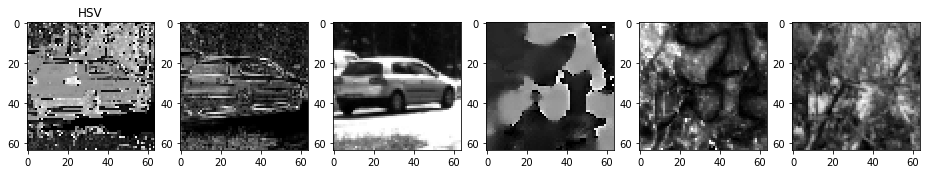

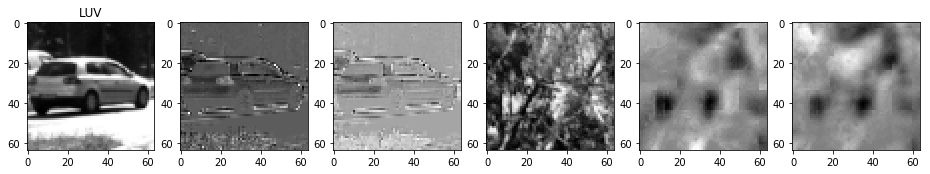

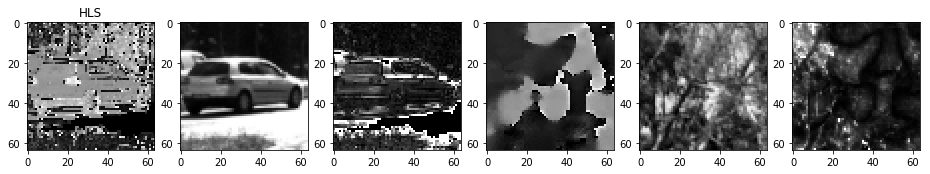

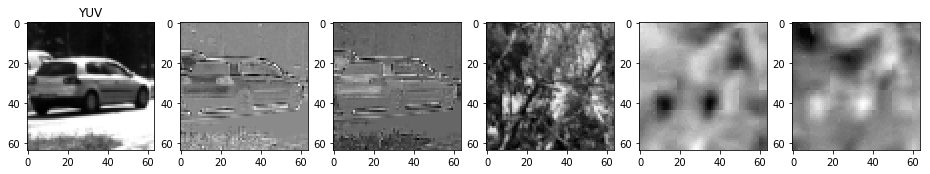

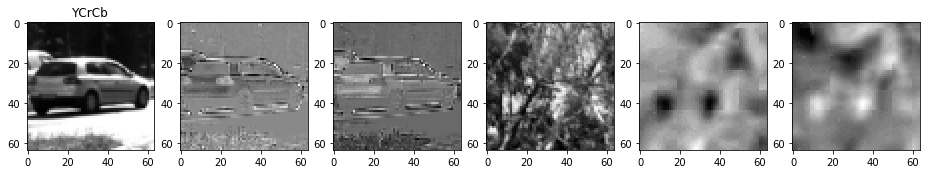

In [5]:
import dataset_generator as dg

def show_channels(img, img2, colspace, figsize=(16,10), pos=161):
    img = dg.to_colorspace(img, colspace)

    fig = plt.figure(figsize=figsize)
    for i in range(3):
        plt.subplot(pos)
        plt.imshow(img[:,:,i], cmap='gray')
        
        if i == 0:
            plt.title(colspace)
        pos += 1

    if img2 is not None:
        img2 = dg.to_colorspace(img2, colspace)
        for i in range(3):
            plt.subplot(pos)
            plt.imshow(img2[:,:,i], cmap='gray')
            pos += 1

show_channels(car_image, notcar_image, 'HSV')
show_channels(car_image, notcar_image, 'LUV')
show_channels(car_image, notcar_image, 'HLS')
show_channels(car_image, notcar_image, 'YUV')
show_channels(car_image, notcar_image, 'YCrCb')

# Color Histogram

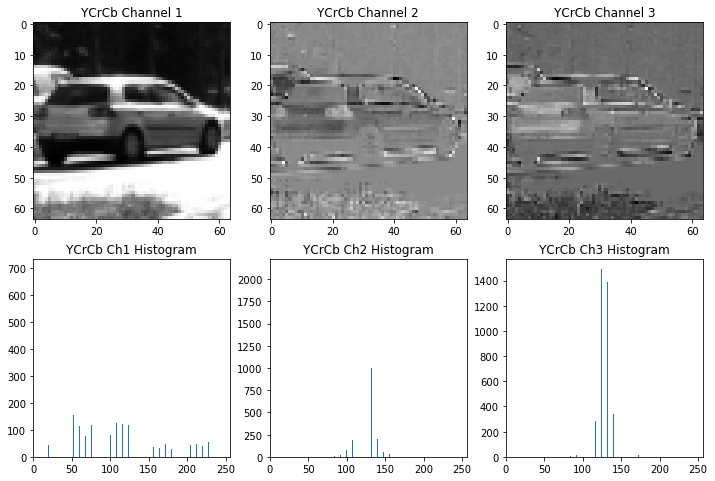

In [13]:
#show_channels(car_image, None, 'YCrCb', figsize=(12,3), pos=131)

img = cv2.cvtColor(car_image, cv2.COLOR_RGB2YCrCb)
rhist, ghist, bhist, bin_centers, hist_features = dg.color_hist((img * 255).astype(np.uint8), nbins=32, histonly=False)

pos = 231
fig = plt.figure(figsize=(12,8))
for i in range(3):
    plt.subplot(pos)
    plt.imshow(img[:,:,i], cmap='gray')
    plt.title('YCrCb Channel {}'.format(i+1))
    pos += 1

plt.subplot(pos)
plt.bar(bin_centers, rhist[0])
plt.xlim(0, 256)
plt.title('YCrCb Ch1 Histogram')

pos += 1

plt.subplot(pos)
plt.bar(bin_centers, ghist[0])
plt.xlim(0, 256)
plt.title('YCrCb Ch2 Histogram')

pos += 1

plt.subplot(pos)
plt.bar(bin_centers, bhist[0])
plt.xlim(0, 256)
plt.title('YCrCb Ch3 Histogram')

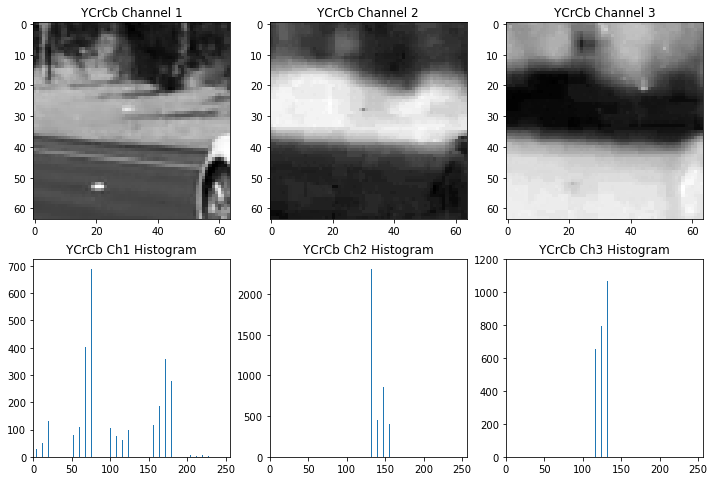

In [20]:
img = cv2.cvtColor(notcar_image, cv2.COLOR_RGB2YCrCb)
rhist, ghist, bhist, bin_centers, hist_features = dg.color_hist((img * 255).astype(np.uint8), nbins=32, histonly=False)

pos = 231
fig = plt.figure(figsize=(12,8))
for i in range(3):
    plt.subplot(pos)
    plt.imshow(img[:,:,i], cmap='gray')
    plt.title('YCrCb Channel {}'.format(i+1))
    pos += 1

plt.subplot(pos)
plt.bar(bin_centers, rhist[0])
plt.xlim(0, 256)
plt.title('YCrCb Ch1 Histogram')

pos += 1

plt.subplot(pos)
plt.bar(bin_centers, ghist[0])
plt.xlim(0, 256)
plt.title('YCrCb Ch2 Histogram')

pos += 1

plt.subplot(pos)
plt.bar(bin_centers, bhist[0])
plt.xlim(0, 256)
plt.title('YCrCb Ch3 Histogram')

## Spatial Binning of Color

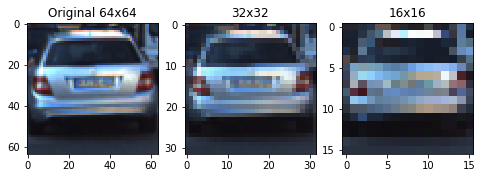

In [22]:
binned_car = dg.bin_spatial(car_image,size=(32,32), asvec=False)
binned_car2 = dg.bin_spatial(car_image,size=(16,16), asvec=False)
fig = plt.figure(figsize=(8,5))
plt.subplot(131)
plt.imshow(car_image)
plt.title('Original 64x64')
plt.subplot(132)
plt.title('32x32')
plt.imshow(binned_car)
plt.subplot(133)
plt.title('16x16')
plt.imshow(binned_car2)

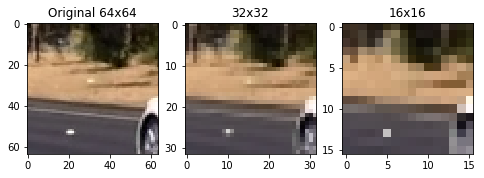

In [24]:
binned_notcar = dg.bin_spatial(notcar_image,size=(32,32), asvec=False)
binned_notcar2 = dg.bin_spatial(notcar_image,size=(16,16), asvec=False)
fig = plt.figure(figsize=(8,5))
plt.subplot(131)
plt.imshow(notcar_image)
plt.title('Original 64x64')
plt.subplot(132)
plt.title('32x32')
plt.imshow(binned_notcar)
plt.subplot(133)
plt.title('16x16')
plt.imshow(binned_notcar2)

## Train an SVM Classifier

In [ ]:
import itertools
from sklearn import metrics
from sklearn import svm
from sklearn.externals import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


In [ ]:
# load model
clf = joblib.load('svm_dataset_8_2_9_3_32.pkl')

## Sliding Window Implementation

In [ ]:
# Contains functions for feature extraction: HOG, color and spatial
import dataset_generator as dg

In [ ]:
from scipy.ndimage.measurements import label

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap

def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image        
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

In [ ]:
test_images = glob.glob('test_images/*.jpg')

for img_name in test_images[0:1]:
    img = mpimg.imread(img_name)
    process_image(img, plot=True, convert=False)